
# Polynomial Regression
 **Linear Regression** (studied earlier)
- Linear regression **fits a straight line to data**.
- **But what if the data is not linear?**
- Polynomial regression is one option:
  $$
  \mathbf{y = w_1x_i + w_2x_i^2 + b}
  $$

**Polynomial Regression**

- uses polynomial equation as a model
- Eg. Quaditic equation,
  $$
  y=w_1x_i+w_2x_i^2+b
  $$

  tries to fix a quadratic line by fitting parameters $w_1, w_2, b$ using:
  - Mean squared error
  - Gradient descent
- For 1 or 2-dimensional space - easy to verify
- But for high-dimensional input ($D > 3$):
  - Hard to choose the right polynomial (as it is difficult to visualize)

---


# Polynomial Regression (using Gradient Descent)

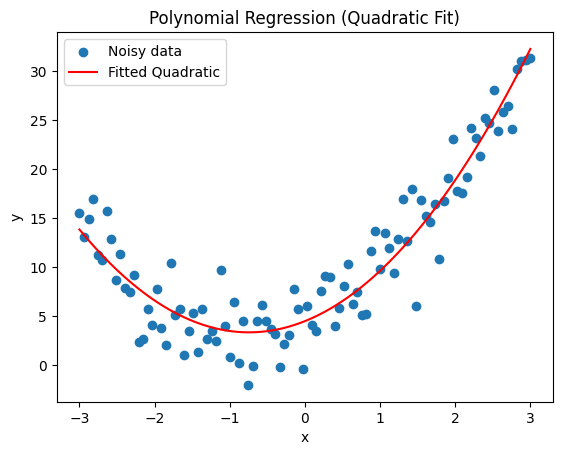

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic non-linear data
np.random.seed(42)
X = np.linspace(-3, 3, 100)
y_true = 2 * X**2 + 3 * X + 5
y = y_true + np.random.randn(*X.shape) * 3  # Add noise

# Convert X to a matrix with [x, x^2]
X_poly = np.vstack([X, X**2]).T

# Initialize weights and bias
w = np.random.randn(2)  # [w1, w2]
b = 0

# Hyperparameters
lr = 0.01
epochs = 1000

# Training using gradient descent
for epoch in range(epochs):
    y_pred = X_poly @ w + b
    error = y_pred - y
    loss = np.mean(error**2)

    # Gradients
    grad_w = 2 * X_poly.T @ error / len(X)
    grad_b = 2 * np.mean(error)

    # Update weights and bias
    w -= lr * grad_w
    b -= lr * grad_b

# Plot results
plt.scatter(X, y, label="Noisy data")
plt.plot(X, X_poly @ w + b, color="red", label="Fitted Quadratic")
plt.legend()
plt.title("Polynomial Regression (Quadratic Fit)")
plt.xlabel("x")
plt.ylabel("y")
plt.show()


# Kernel Regression

- **Non-parametric method**
- Model depends entirely on data (like in **kNN**)

**Prediction function**: $f(x) = \frac{1}{N} \sum_{i=1}^{N} w_i y_i$

$$ 
\text{where } w_i = \frac{k(\frac{x_i - x}{b})}{\sum_{k=1}^{N} k(\frac{x_k - x} {b})}
$$
$$
k() - \text{kernel}, b - \text{bandwidth (a hyperparameter)}
$$

## What is a Kernel?

- A function that measures **similarity** between two data points.
- Commonly used kernel function : **Gaussian kernel**
$$
k(z) = \frac{1}{\sqrt{2\pi}} \exp\left(-\frac{z^2}{2}\right)
$$
- Weighs data points based on their distance from $x$

## Hyperparameter $b$

- $b$ - **bandwidth** of the kernel, affects how local or global the model is
- **Large b : -**
  - makes the **kernel wider (flatter)**,
  - more neighbors get significant weight -> smoother curve
- **Small b : -**
  - makes the kernel narrower (sharper peak)
  - only nearby points get high weight -> more wiggly curve
- Tuned using a **validation set** (Pick the one that minimizes validation error)

## Effect of $b$ on Fit

<img src= "Images/Effect_of_b_7.png" width= 500>

- Small $b$ : Overfit (wiggly curve)
- Large $b$: Underfit (too smooth)
- Kernel regression works with high-dimensional features also

---


# Kernel Regression (with Gaussian Kernel)

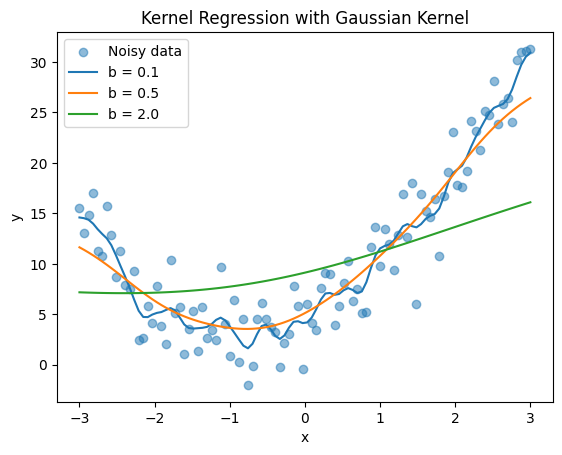

In [2]:
# Define Gaussian kernel
def gaussian_kernel(z):
    return (1 / np.sqrt(2 * np.pi)) * np.exp(-0.5 * z**2)

# Kernel regression prediction
def kernel_regression(X_train, y_train, X_test, bandwidth):
    y_pred = []
    for x in X_test:
        weights = gaussian_kernel((X_train - x) / bandwidth)
        weights /= np.sum(weights)
        y_pred.append(np.sum(weights * y_train))
    return np.array(y_pred)

# Predict with different bandwidths
bandwidths = [0.1, 0.5, 2.0]
plt.scatter(X, y, label="Noisy data", alpha=0.5)

for b in bandwidths:
    y_kernel = kernel_regression(X, y, X, bandwidth=b)
    plt.plot(X, y_kernel, label=f"b = {b}")

plt.legend()
plt.title("Kernel Regression with Gaussian Kernel")
plt.xlabel("x")
plt.ylabel("y")
plt.show()


# Multiclass Classification

- In multiclass classification:
  $$
  y \in \{1, 2, ..., C\}
  $$
- The label can belong to one of **C classes**.
- Many algorithms are binary (e.g., SVM).
- But some algorithms **can naturally handle** multiple classes.

**Algorithms That Naturally Extend**

-  Decision Trees (e.g., ID3)
    - Estimate class probability: 
    $f_{ID3}(x) = Pr(y_i = c|x) = \frac{1}{|S|} \sum_{\{y \mid (x, y) \in S, y = c\}} y$
    - Just count how many times each class appears in dataset $S$.

- Logistic Regression
    - Replace **sigmoid** with **softmax** for multiple classes.
    - Softmax gives probabilities across multiple classes:
      $$
      \text{softmax}(z)_i = \frac{e^{z_i}}{\sum_{j=1}^{C} e^{z_j}}
      $$

- k-Nearest Neighbors (kNN)
    - Look at **k closest points**
    - Predict the **most frequent class** among them

**Algorithms That Don't Extend Naturally**

- **Support Vector Machines (SVM)**
    - Designed for **binary classification**
    - No direct support for multiple classes
    - **Strategy: One-vs-Rest (OvR)**
        - Convert a **C-class** problem into **C binary problems**
        - For each class:
            - Label it as 1 (positive)
            - Label all others as 0 (negative)

**One-vs-Rest: Example (3 Classes)**

- If $y \in \{1, 2, 3\}$, make 3 datasets:
  - Model 1: 1 vs not-1 (2,3)
  - Model 2: 2 vs not-2 (1,3)
  - Model 3: 3 vs not-3 (1,2)
- Train **3 binary classifiers**

**Making Predictions**
- Input: a new feature vector $x$
- Apply all 3 models → get 3 scores
- Pick the class with the **highest score** (or most certain prediction)

### Interpreting Certainty
**Logistic Regression :**
- Returns probability $\in (0, 1)$
- Higher value → more certain  

**SVM:**
- Returns a **distance to decision boundary** :
$$
d = \frac{w \cdot x + b}{\|w\|}
$$
- Greater distance → higher certainty

---


# Multiclass Classification with Softmax (Logistic Regression)

              precision    recall  f1-score   support

           0       0.98      0.82      0.89        50
           1       0.88      0.95      0.91        55
           2       0.92      1.00      0.96        45

    accuracy                           0.92       150
   macro avg       0.93      0.92      0.92       150
weighted avg       0.92      0.92      0.92       150



c:\Users\sriya\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


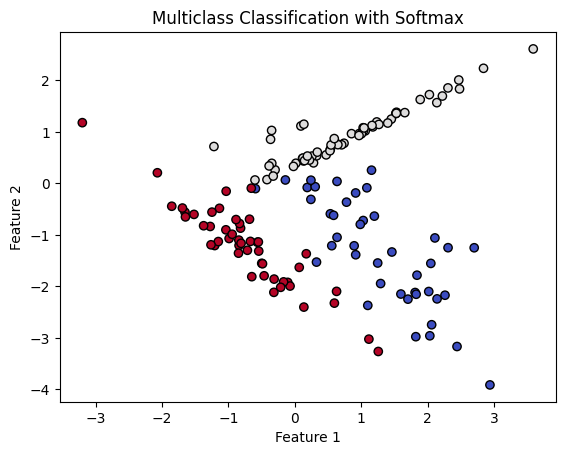

In [3]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Create 3-class synthetic data
X, y = make_classification(n_samples=500, n_features=2, n_classes=3,
                           n_informative=2, n_redundant=0, n_clusters_per_class=1,
                           random_state=42)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train logistic regression with softmax
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

# Visualize
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap="coolwarm", edgecolor='k')
plt.title("Multiclass Classification with Softmax")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# One-vs-Rest with SVMs (Binary Classifiers for Multiclass)

In [4]:
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier

# Use same dataset as above
svm_model = OneVsRestClassifier(SVC(kernel='linear', probability=True))
svm_model.fit(X_train, y_train)

# Predict
y_pred_ovr = svm_model.predict(X_test)
print("OvR SVM Classification Report:")
print(classification_report(y_test, y_pred_ovr))

OvR SVM Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.70      0.81        50
           1       0.78      0.95      0.85        55
           2       0.94      0.98      0.96        45

    accuracy                           0.87       150
   macro avg       0.89      0.87      0.87       150
weighted avg       0.89      0.87      0.87       150



# Decision Tree Classifier for Multiclass

In [5]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)

print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_tree))

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.82      0.86        50
           1       0.91      0.93      0.92        55
           2       0.92      1.00      0.96        45

    accuracy                           0.91       150
   macro avg       0.91      0.92      0.91       150
weighted avg       0.91      0.91      0.91       150




# One-Class Classification

- Also called:
  - Unary Classification
  - Class Modeling
- Learns from **only one class** of data
- **Goal:** Detect if a new input **belongs to this class** or not
- Used in:
  - Outlier detection
  - Anomaly detection
  - Novelty detection

## How is it Different?

- Traditional classification:  
  - Learns from **multiple classes**
- One-class classification:  
  - Learns from **only one class**

**Example:**  
Detecting normal traffic in a secure network  
- Normal traffic: many examples  
- Attack traffic: rare or unknown

## Common One-Class Algorithms

- One-Class Gaussian
- One-Class k-Means
- One-Class k-Nearest Neighbors (kNN)
- One-Class Support Vector Machine (SVM)

## One-Class Gaussian

- Assumes data comes from a **Multivariate Normal Distribution (MND)**  

- Probability Density Function:
    $$
    f_{\mu,\Sigma}(x) = \frac{1}{(2\pi)^{D/2}|\Sigma|^{1/2}} \exp\left(-\frac{1}{2}(x - \mu)^T \Sigma^{-1}(x - \mu)\right)
    $$
    where:
    - $\mu$: Mean vector (center)
    - $\Sigma$: Covariance matrix (shape)
    - $|\Sigma|$: Determinant of the covariance matrix
    - $\Sigma^{-1}$: Inverse of the covariance matrix
    - $(x - \mu)^T$: Transpose of the difference vector*

- **Interpretation of Parameters**

    - **$\mu$** → Where the Gaussian is centered  
    - **$\Sigma$** → Shape and spread of the distribution  
    - Use **maximum likelihood** to learn both from data

- **Making Predictions**

    - Once model is trained, compute:
      $$
      f_{\mu,\Sigma}(x)
      $$
    - If this **likelihood > threshold** → belongs to the class  
    - Otherwise → **classified as an outlier**
    - Threshold is chosen based on: Experimental tuning.

## Mixture of Gaussians 

- For complex data shapes:
  - Combine several Gaussians
- Learn:
  - One $\mu$ and $\Sigma$ for each component
  - Extra parameters to combine them

(Covered later)

---


Point 0: [0.2 0.1], Probability = 0.18088 → In-Class
Point 1: [3. 3.], Probability = 0.00070 → Outlier
Point 2: [-2. -2.], Probability = 0.01110 → In-Class


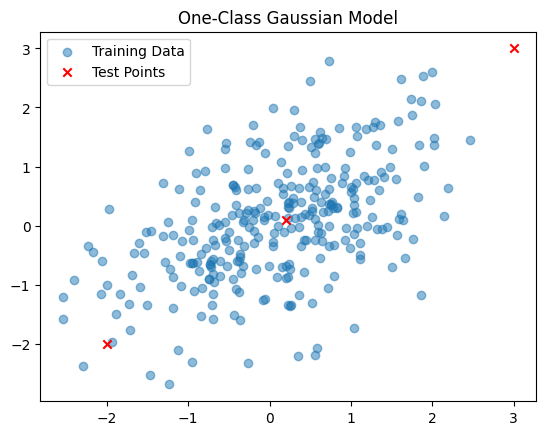

In [6]:
import numpy as np
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt

# Simulated normal traffic (2D points from a Gaussian)
np.random.seed(0)
mean = [0, 0]
cov = [[1, 0.5], [0.5, 1]]
X_train = np.random.multivariate_normal(mean, cov, 300)

# Fit a multivariate Gaussian
mu = np.mean(X_train, axis=0)
sigma = np.cov(X_train.T)
rv = multivariate_normal(mean=mu, cov=sigma)

# Predict for new points (some inliers, some outliers)
X_test = np.array([
    [0.2, 0.1],     # inlier
    [3, 3],         # outlier
    [-2, -2],       # border
])

probs = rv.pdf(X_test)
threshold = 0.01  # Choose a threshold by tuning/validation

for i, (point, prob) in enumerate(zip(X_test, probs)):
    print(f"Point {i}: {point}, Probability = {prob:.5f} → {'In-Class' if prob > threshold else 'Outlier'}")

# Visualize
plt.scatter(X_train[:, 0], X_train[:, 1], label="Training Data", alpha=0.5)
plt.scatter(X_test[:, 0], X_test[:, 1], color='red', label="Test Points", marker='x')
plt.title("One-Class Gaussian Model")
plt.legend()
plt.show()


## One-Class k-Means

- Use **k-means clustering** on training data
- For a new input $x$ :
  - Compute:
    $$
    d(x) = \min_{i} \text{distance}(x, \text{cluster center}_i)
    $$
  - If $d(x)$ < threshold → accept as in-class

---

In [7]:
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

# Use same training data as above
kmeans = KMeans(n_clusters=3, random_state=0).fit(X_train)
cluster_centers = kmeans.cluster_centers_

# Compute min distance from any cluster center
distances = np.min(np.linalg.norm(X_test[:, None, :] - cluster_centers[None, :, :], axis=2), axis=1)

threshold = 2.5  # Set manually or via validation
for i, dist in enumerate(distances):
    print(f"Point {i}: Distance = {dist:.2f} → {'In-Class' if dist < threshold else 'Outlier'}")

Point 0: Distance = 0.27 → In-Class
Point 1: Distance = 2.83 → Outlier
Point 2: Distance = 1.32 → In-Class



## One-Class SVM

- Two formulations:
  1. **Separate data from origin** in feature space  
     - Maximize margin from origin
  2. **Find minimal hypersphere** around data  
     - Enclose training data with smallest possible volume

---

In [8]:
from sklearn.svm import OneClassSVM

# Train one-class SVM
oc_svm = OneClassSVM(kernel='rbf', gamma='auto', nu=0.05)  # nu = fraction of outliers allowed
oc_svm.fit(X_train)

# Predict (1 = inlier, -1 = outlier)
preds = oc_svm.predict(X_test)

for i, p in enumerate(preds):
    print(f"Point {i}: {X_test[i]} → {'In-Class' if p == 1 else 'Outlier'}")

Point 0: [0.2 0.1] → In-Class
Point 1: [3. 3.] → Outlier
Point 2: [-2. -2.] → In-Class


# Multi-Label Classification

- Each input can have **multiple labels**.
- Example: An image might be labeled:
  - "people", "concert", "nature" — all at once unlike multiclass, where one example has one label

## Transforming Multi-Label to Multi-Class

- If labels are like **tags** (many, same nature), you can:
  - Split each example into multiple ones — one per label
  - Each has the same feature vector but only one label
- Now treat it as **multiclass**
- Use **One-vs-Rest strategy**

**Threshold Hyperparameter**

- Prediction produces **scores for each label**

- Apply a **threshold**:
  - If score > threshold → assign that label
- Multiple labels can be assigned if multiple scores exceed threshold
- Threshold is chosen using **validation set**

## Algorithms That Work for Multi-Label

- Algorithms that naturally work for **multiclass** can be reused:
  - Decision Trees
  - Logistic Regression
  - Neural Networks
- These return a score per class → apply thresholding


In [9]:
# Multi-Label Logistic Regression

from sklearn.datasets import make_multilabel_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import classification_report

# Generate synthetic multi-label dataset
X, y = make_multilabel_classification(n_samples=1000, n_classes=5, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Wrap logistic regression with OneVsRestClassifier
model = OneVsRestClassifier(LogisticRegression(max_iter=1000))
model.fit(X_train, y_train)

# Predict probabilities and apply threshold (optional)
y_pred = model.predict(X_test)

# Evaluate
print("Multi-label Classification Report:")
print(classification_report(y_test, y_pred))

Multi-label Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.63      0.67        81
           1       0.77      0.80      0.78       157
           2       0.77      0.82      0.79       133
           3       0.77      0.72      0.74       106
           4       0.58      0.45      0.51        47

   micro avg       0.75      0.73      0.74       524
   macro avg       0.72      0.68      0.70       524
weighted avg       0.74      0.73      0.73       524
 samples avg       0.75      0.73      0.70       524



c:\Users\sriya\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\sriya\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\sriya\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mod


## Neural Networks for Multi-Label

- Output layer:
  - One unit per label
  - Each unit uses **sigmoid** activation
- Labels are binary:
  $$
  y_{i,l} \in \{0, 1\}
  $$
- Use **Binary Cross-Entropy Loss**:
  $$
  -\left( y_{i,l} \log(\hat{y}_{i,l}) + (1 - y_{i,l}) \log(1 - \hat{y}_{i,l}) \right)
  $$

## Total Loss for Neural Networks

- Average the binary cross-entropy:
  - Over all **labels $l$** and all **examples $i$** in the training set
- Optimized using gradient descent or other optimizers

## Alternate Approach :
### Flatten Labels

- Used when number of combinations is **small**
- Example:
  - Label 1: {photo, painting}
  - Label 2: {portrait, paysage, other}
- Make **6 fake classes** combining both

### Fake Class Mapping Table

| Fake Class | Label 1 | Label 2   |
|------------|---------|-----------|
| 1          | photo   | portrait  |
| 2          | photo   | paysage   |
| 3          | photo   | other     |
| 4          | painting| portrait  |
| 5          | painting| paysage   |
| 6          | painting| other     |

- Now treat as **standard multiclass problem**

## Pros and Cons of Flattening

### Advantage:
- Keeps **label correlations** intact  
  (labels depend on each other)

### Disadvantage:
- If label combinations are many:
  - Need a **lot more data**
  - Class space grows exponentially

## Why Label Correlation Matters?

- Predicting multiple **related labels**
- Example: Email classification  
  - Labels: [spam, not_spam], [ordinary, priority]
- Avoid invalid combos like:
  - [spam, priority] — doesn’t make sense

---


## Neural Network for Multi-Label (with PyTorch)

In [10]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.datasets import make_multilabel_classification

# Data
X, y = make_multilabel_classification(n_samples=1000, n_classes=5, random_state=42)
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32)

# Model
class MultiLabelNN(nn.Module):
    def __init__(self, input_dim, output_dim):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Linear(64, output_dim),
            nn.Sigmoid()  # One sigmoid per label
        )

    def forward(self, x):
        return self.net(x)

model = MultiLabelNN(X.shape[1], y.shape[1])
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Training loop (simplified)
for epoch in range(50):
    optimizer.zero_grad()
    output = model(X)
    loss = criterion(output, y)
    loss.backward()
    optimizer.step()
    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Loss = {loss.item():.4f}")

Epoch 0, Loss = 0.7139
Epoch 10, Loss = 0.4310
Epoch 20, Loss = 0.3806
Epoch 30, Loss = 0.3491
Epoch 40, Loss = 0.3272



# Ensemble Learning

- Train **many weak models**, not one strong model
- Combine their predictions → build a **meta-model**
- Goal: Improve **accuracy** through diversity and voting

### Weak Learners

- Usually fast and simple models (e.g., **shallow decision trees**)
- Individually: not very accurate
- Together: can form a strong predictor

## How Does Ensemble Work?

- Each weak model gives a prediction
- Predictions are **combined** (average or vote)
- Example: If most say “spam,” we label input as spam

---



# Two Popular Algorithms

- **Random Forest** (Bagging)
- **Gradient Boosting** (Boosting)

## Random Forest:- 


#### Bagging

- Bagging = Bootstrap Aggregating
- Make **B random samples** (with replacement)
- Train **B decision trees**
- Combine predictions

**Sampling in Bagging**

- For each sample $S_b$, draw $N$ examples **with replacement**
- Train one decision tree on each $S_b$
- Predict on new example $x$ :
  - Regression: average of predictions
  - Classification: majority vote

#### Feature Randomization

- At each split → pick **random subset of features**
- Prevents correlation between trees
- Why? Correlated trees -> less useful diversity

---

## Gradient Boosting

- Another ensemble method
- Trains models **sequentially**, not in parallel
- Each new model fixes **errors** made by previous ones

## Gradient Boosting for Regression

1. Start with a constant model:  
$f_0(x) = \frac{1}{N} \sum_{i=1}^{N} y_i$
2. Compute **residuals**:  $\hat{y}_i = y_i - f(x_i)$
3. Train tree on residuals
4. Update model:  
   $f = f_0 + \eta f_1$
5. Repeat until M trees trained

### Why "Gradient" Boosting?

- We don't compute gradients directly
- Residuals are **proxies for gradients**
- Just like small steps in gradient descent

### Key Hyperparameters

- Number of trees (M)
- Learning rate ($\eta$)
- Tree depth

Deeper trees = slower training, better accuracy

## Bias vs Variance

- **Bagging** reduces **variance** (avoids overfitting)
- **Boosting** reduces **bias** (avoids underfitting)
- Boosting can overfit → tune depth, $M$, and $\eta$

## Gradient Boosting for Classification (Binary)

- Prediction uses **sigmoid function**:  
  $$
  \Pr(y=1|x) = \frac{1}{1 + e^{-f(x)}}
  $$  
  $$
  \text{where } f(x) = \sum_{m=1}^{M} f_m(x)
  $$

## Maximizing Likelihood

- Maximize:  
  $$
  L_f = \sum_{i=1}^{N} \ln(Pr(y_i = 1 | x_i, f))
  $$
- Start with:  
  $$
  f_0 = \ln\left(\frac{p}{1 - p}\right), p = \frac{1}{N} \sum y_i
  $$

## Training Steps per Iteration

1. Compute gradients $g_i$ for each example
2. Replace $y_i$ with $g_i$ in dataset
3. Train new tree $f_m$
4. Find optimal step $\lambda_m$
5. Update model:  
   $f \leftarrow f + \eta \lambda_m f_m$

Repeat until $m = M$

---


## Random Forest (Bagging)

In [11]:
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

# Create synthetic classification data
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5,
                           n_redundant=0, n_classes=2, random_state=42)

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Train Random Forest (Bagging)
rf = RandomForestClassifier(n_estimators=100, max_features='sqrt', random_state=42)
rf.fit(X_train, y_train)

# Predict
y_pred = rf.predict(X_test)

# Evaluate
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred))

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.92      0.93       149
           1       0.92      0.93      0.93       151

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300



## Gradient Boosting for Regression

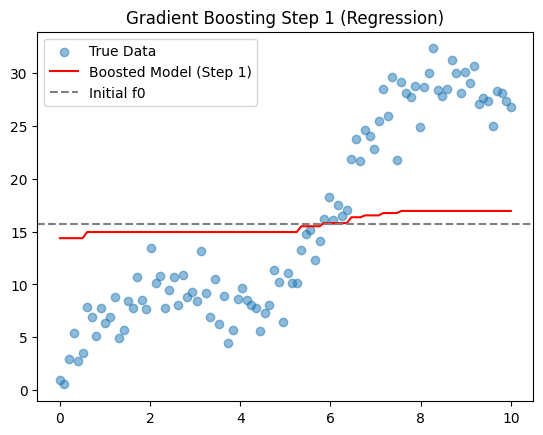

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

# Generate a quadratic regression dataset
np.random.seed(42)
X = np.linspace(0, 10, 100).reshape(-1, 1)
y = 3 * X.squeeze() + np.sin(X).squeeze() * 5 + np.random.randn(100) * 2

# Step 1: Initial model f0 = mean
f0 = np.mean(y)
residuals = y - f0  # True residuals

# Step 2: Fit a tree to residuals
tree = DecisionTreeRegressor(max_depth=3)
tree.fit(X, residuals)
f1 = tree.predict(X)

# Step 3: Update model: f = f0 + η*f1
eta = 0.1
y_pred_boosted = f0 + eta * f1

# Plot
plt.scatter(X, y, label="True Data", alpha=0.5)
plt.plot(X, y_pred_boosted, color='r', label="Boosted Model (Step 1)")
plt.axhline(f0, linestyle='--', color='gray', label="Initial f0")
plt.legend()
plt.title("Gradient Boosting Step 1 (Regression)")
plt.show()

(using XGBoost)

In [13]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

# Train Gradient Boosting Regressor
model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model.fit(X, y)

# Predict and evaluate
y_pred = model.predict(X)
mse = mean_squared_error(y, y_pred)
print(f"Mean Squared Error: {mse:.4f}")

Mean Squared Error: 0.9389


## Gradient Boosting for Binary Classification

In [14]:
from xgboost import XGBClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report

# Binary classification dataset
X, y = make_classification(n_samples=1000, n_classes=2, n_features=10, random_state=42)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Train gradient boosting classifier
clf = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, use_label_encoder=False, eval_metric='logloss')
clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test)
print("Gradient Boosting Classification Report:")
print(classification_report(y_test, y_pred))

Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.92      0.90       147
           1       0.92      0.89      0.90       153

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300



c:\Users\sriya\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:14:55] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



# Learning to Label Sequences  

## What is Sequence Labeling?

- Sequence 
  - Language: words/sentences
  - Biology: DNA/proteins
  - Finance: stock prices
- Sequence labeling = assign labels to each element of sequence

## Input and Output Format

- Each example is a pair of lists (X, Y)
  - X = list of feature vectors (per time step)
  - Y = list of labels (same length as X)
- Example:  
  X = ["big", "beautiful", "car"]  
  Y = ["adjective", "adjective", "noun"]

## Formal Notation

- Example $i$:  
  $$
  X_i = [x^1_i, x^2_i, ..., x^{n}_i]
  $$
  $$ 
  Y_i = [y^1_i, y^2_i, ..., y^{n}_i]
  $$  
- Each $y^t_i \in \{1, 2, ..., C\}$  
- Length of each sequence = $\text{size}_i$

## Using RNNs for Sequence Labeling

- At time $t$: input $x^t_i$, output $y^t$
- Types of labels:
  - Binary
  - Multiclass
  - Multilabel
- Uses recurrent structure to capture **context**

## Conditional Random Fields (CRF)

- CRF - popular alternative to RNNs
- Useful when **feature vectors are rich**
- Example task: Named Entity Recognition (NER)
  - Sentence: “I go to San Francisco”
  - Labels: \{location, name, company_name, other\}

## Feature Engineering in CRFs

- CRFs depend on informative features like:
  - Does the word start with a capital letter?
  - Is the word found in a location list?
- Requires **handcrafted features** and **domain expertise**

## CRFs vs RNNs

| Criteria         | CRF          | RNN               |
|------------------|--------------|-------------------|
| Feature design   | Requires handcrafted features | Learns features automatically |
| Speed            | Slower training | Faster with large data|
| Accuracy         | Good with strong features | Usually better with deep models|
| Scalability      | Limited      | High              |

---



# Sequence-to-Sequence Learning

- Seq2seq learning generalizes sequence labeling  
- Input sequence $X_i$ and output sequence $Y_i$ can have **different lengths**  
- Applications:  
  - Machine translation (e.g. English → French)  
  - Conversational interfaces (chatbots)  
  - Text summarization  
  - Spelling correction  
  - And many others  

## Neural Networks for Seq2Seq

- Many seq2seq problems are solved by neural networks  
- Multiple architectures exist depending on the task  
- All share a common structure:  
  - **Encoder**  
  - **Decoder**  
- Also called **encoder-decoder neural networks**

## Encoder

- Neural network that reads sequential input  
- Can be:  
  - RNN  
  - CNN  
  - Other architectures  
- Generates a **state** (numerical representation of meaning)  
- Output is an **embedding** (vector or matrix of real numbers)

## Decoder

- Neural network that takes the embedding as input  
- Generates a sequence of outputs  
- Starts with a start-of-sequence vector $x^{(0)}$ (often zeros)  
- Produces output $y^{(1)}$ and updates its state combining embedding + $x^{(0)}$  
- Output $y^{(1)}$ used as next input $x^{(1)}$  
- Dimensionality of $y^{(t)}$ can be same or different as $x^{(t)}$  
- Both encoder and decoder are trained together using backpropagation

## RNN Output 

- Each RNN layer can produce multiple outputs simultaneously  
- One output generates label $y^{(t)}$  
- Another output can be used as next input $x^{(t)}$

## Traditional Seq2Seq Architecture

<img src= "Images/Seq_2_seq_7.png" width= 500>

---

## Attention Mechanism

- Improves prediction accuracy  
- Adds parameters combining:  
  - Encoder outputs (all time step states)  
  - Current decoder state  
- Helps capture long-term dependencies better than gated or bidirectional RNNs

---

## Seq2Seq with Attention Architecture
<img src= "Images\Seq2seq_with_attension.png" width= 500>

---


# Sequence Labeling with RNNs (e.g. tagging-like task)

In [15]:
import torch
import torch.nn as nn

# Simulate a small vocabulary and label set
vocab = {"big": 0, "beautiful": 1, "car": 2}
labels = {"adj": 0, "noun": 1}

# Example sentence: ["big", "beautiful", "car"] → ["adj", "adj", "noun"]
X = torch.tensor([[0, 1, 2]])  # (batch_size=1, seq_len=3)
Y = torch.tensor([[0, 0, 1]])  # true labels

class SimpleRNNTagger(nn.Module):
    def __init__(self, vocab_size, embed_dim, hidden_dim, num_classes):
        super().__init__()
        self.embed = nn.Embedding(vocab_size, embed_dim)
        self.rnn = nn.RNN(embed_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, num_classes)

    def forward(self, x):
        x = self.embed(x)
        rnn_out, _ = self.rnn(x)
        out = self.fc(rnn_out)
        return out  # shape: (batch, seq_len, num_classes)

model = SimpleRNNTagger(vocab_size=3, embed_dim=8, hidden_dim=16, num_classes=2)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Training step (1 example for demo)
for epoch in range(50):
    optimizer.zero_grad()
    output = model(X)  # output shape: (1, 3, 2)
    loss = criterion(output.view(-1, 2), Y.view(-1))
    loss.backward()
    optimizer.step()
    if epoch % 10 == 0:
        print(f"Epoch {epoch}: Loss = {loss.item():.4f}") 

Epoch 0: Loss = 0.6023
Epoch 10: Loss = 0.0525
Epoch 20: Loss = 0.0055
Epoch 30: Loss = 0.0016
Epoch 40: Loss = 0.0009


# Sequence-to-Sequence with Attention (Encoder-Decoder)

In [16]:
# Character-level encoder-decoder: input = "abc", output = "xyz" (same length)

class Encoder(nn.Module):
    def __init__(self, input_dim, emb_dim, hidden_dim):
        super().__init__()
        self.embed = nn.Embedding(input_dim, emb_dim)
        self.rnn = nn.GRU(emb_dim, hidden_dim, batch_first=True)

    def forward(self, src):
        embedded = self.embed(src)
        outputs, hidden = self.rnn(embedded)
        return hidden  # Pass last hidden state

class Decoder(nn.Module):
    def __init__(self, output_dim, emb_dim, hidden_dim):
        super().__init__()
        self.embed = nn.Embedding(output_dim, emb_dim)
        self.rnn = nn.GRU(emb_dim, hidden_dim, batch_first=True)
        self.fc_out = nn.Linear(hidden_dim, output_dim)

    def forward(self, tgt, hidden):
        embedded = self.embed(tgt)
        outputs, _ = self.rnn(embedded, hidden)
        return self.fc_out(outputs)

# Dummy char vocab: a=0, b=1, c=2, x=3, y=4, z=5
src = torch.tensor([[0, 1, 2]])  # "abc"
tgt = torch.tensor([[3, 4, 5]])  # "xyz"

INPUT_DIM = 6
OUTPUT_DIM = 6
EMB_DIM = 8
HID_DIM = 16

enc = Encoder(INPUT_DIM, EMB_DIM, HID_DIM)
dec = Decoder(OUTPUT_DIM, EMB_DIM, HID_DIM)

# One pass
enc_hidden = enc(src)
output = dec(tgt, enc_hidden)
print("Seq2Seq output shape:", output.shape)  # (batch, seq_len, output_dim)

Seq2Seq output shape: torch.Size([1, 3, 6])



# Active Learning

- Active learning is a supervised learning paradigm  
- Useful when **labeling data is costly**  
- Common in medical, financial domains where expert annotation is needed  
- Start with few labeled examples + many unlabeled  
- Iteratively label only the most **informative** examples  

## Strategies of Active Learning

Two main strategies discussed here:  
1. Data density + uncertainty based  
2. Support vector machine (SVM) based

## Data Density & Uncertainty Based Strategy

- Train model $f$ on labeled data  
- For each unlabeled example $x$, compute importance score:  
  $$
  \text{importance}(x) = \text{density}(x) \times \text{uncertainty}_f(x)
  $$
- **Density**: How many examples surround $x$  
- **Uncertainty**: How unsure model $f$ is about $x$

## Uncertainty in Binary Classification

- Using sigmoid output:  
- Prediction close to 0.5 → high uncertainty  
- In SVM:  
  - Closer to decision boundary → more uncertain

## Uncertainty in Multiclass Classification

- Use **entropy** as uncertainty measure:  
  $$
  H_f(x) = - \sum_{c=1}^{C} Pr(y^{(c)}; f(x)) \ln Pr(y^{(c)}; f(x))
  $$
- Max entropy $= 1$ when all classes equally likely  
- Min entropy $= 0$ when model is certain about one class

## Density Computation

- Average distance from $x$ to its $k$ nearest neighbors  
- $k$ is a hyperparameter  
- High density → example lies in a well-populated region

## Active Learning Loop

1. Compute importance scores for unlabeled data  
2. Select example with highest score  
3. Ask expert to annotate it  
4. Add new labeled example to training set  
5. Retrain model  
6. Repeat until stopping criterion is met  

## Stopping Criteria

- Fixed budget (max number of expert queries)  
- Model performance threshold on a metric

## SVM-based Active Learning

- Train SVM on labeled data  
- Select unlabeled example closest to SVM hyperplane  
- Closest examples are most uncertain → highest potential to improve model  

## Other Active Learning Strategies

- **Cost-sensitive learning**: Consider cost of querying expert  
- **Query by Committee**:  
  - Train multiple models  
  - Query examples where models disagree the most  
- Select examples that reduce model **variance** or **bias** the most

---


# Active Learning Simulation (with uncertainty + density)

In [17]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from scipy.stats import entropy
from sklearn.metrics.pairwise import euclidean_distances
from scipy.stats import entropy as scipy_entropy

# Labeled + unlabeled split
X, y = make_classification(n_samples=500, n_features=5, n_classes=2, random_state=42)
X_labeled = X[:50]
y_labeled = y[:50]
X_unlabeled = X[50:]

# Train model
model = LogisticRegression()
model.fit(X_labeled, y_labeled)

# Compute uncertainties (entropy of predicted probs)
probs = model.predict_proba(X_unlabeled)
uncertainties = np.array([scipy_entropy(p) for p in probs])  # Entropy per example

# Compute densities (mean distance to k neighbors)
k = 5
dists = euclidean_distances(X_unlabeled, X_unlabeled)
density = -np.mean(np.sort(dists, axis=1)[:, 1:k+1], axis=1)  # Negative for higher = denser

# Importance score
importance = uncertainties * density

# Pick top example to label next
top_idx = np.argmax(importance)
print(f"Top candidate index: {top_idx}, Uncertainty: {uncertainties[top_idx]:.3f}, Density: {abs(density[top_idx]):.3f}") 

Top candidate index: 102, Uncertainty: 0.001, Density: 2.046



# Semi-Supervised Learning (SSL)

- Small fraction of dataset is labeled  
- Majority of examples are unlabeled  
- Goal: Use unlabeled data to improve model without extra labeling effort

## Early SSL Methods: Self-Learning

- Train initial model on labeled data  
- Label unlabeled examples with model predictions  
- Add examples with confidence > threshold to training set  
- Retrain and repeat until stopping criterion met  
- Improvement often small; can sometimes degrade model

## Use of Neural Networks & SSL 

- Recent advances brought impressive results  
- Example: MNIST dataset  
  - 10 labeled examples per class → nearly perfect accuracy  
  - Total 70,000 labeled examples in MNIST  
- Key architecture: **Ladder Network**

## What is an Autoencoder?

- Feed-forward neural network with encoder-decoder  
- Trained to reconstruct input: pairs $(x, x)$  
- Bottleneck layer in middle compresses input to embedding  
- Decoder reconstructs input from embedding  
- Bottleneck usually smaller dimension than input  

- Cost function:  
  - Mean Squared Error (MSE) for continuous features  
  $$
  \frac{1}{N} \sum_{i=1}^N \|x_i - f(x_i)\|^2
  $$
  - Negative Log-Likelihood for binary features  

## Denoising Autoencoder

- Corrupt input $x$ by adding noise during training  
- Noise sampled from Gaussian distribution:  
  $$
  n^{(j)} \sim \mathcal{N}(\mu, \sigma^2)
  $$
- Train network to reconstruct original input from corrupted input

## Ladder Networks

- Autoencoder having same number of encoder and decoder layers  
- Bottleneck layer predicts label (softmax activation)  
- Multiple cost functions:  
  - Reconstruction cost for each layer $C_d^l$  
  - Classification cost $C_c$ for labeled examples  
- Optimize combined cost:  
  $$
  C_c + \sum_{l=1}^L \lambda^l C_d^l
  $$
- Noise added to input as well as encoder layers during training  

## Other SSL Approaches

- Clustering based:  
  - Build model on labeled data  
  - Cluster labeled + unlabeled examples together  
  - Predict label by majority vote in cluster  

- S3VM (Semi-Supervised SVM):  
  - Train SVMs on possible labelings of unlabeled data  
  - Choose model with largest margin  
  - Efficient algorithms avoid exhaustive search

----


# Self-Learning (Self-Training Classifier)

In [18]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np

# Simulate dataset
X, y = make_classification(n_samples=500, n_features=10, n_classes=2, random_state=42)

# Split: 40 labeled, rest unlabeled
X_labeled = X[:40]
y_labeled = y[:40]
X_unlabeled = X[40:]
y_unlabeled_true = y[40:]  # we keep this for checking accuracy

# Train initial model
model = LogisticRegression()
model.fit(X_labeled, y_labeled)

# Predict on unlabeled data
probs = model.predict_proba(X_unlabeled)
confidence = np.max(probs, axis=1)
pseudo_labels = model.predict(X_unlabeled)

# Add confident predictions to labeled set
threshold = 0.95
confident_idx = np.where(confidence > threshold)[0]
print(f"{len(confident_idx)} confident pseudo-labels")

X_new = np.vstack([X_labeled, X_unlabeled[confident_idx]])
y_new = np.concatenate([y_labeled, pseudo_labels[confident_idx]])

# Retrain with extended dataset
model.fit(X_new, y_new)

# Evaluate on remaining unlabeled data
remaining_idx = np.setdiff1d(np.arange(len(X_unlabeled)), confident_idx)
y_pred = model.predict(X_unlabeled[remaining_idx])
acc = accuracy_score(y_unlabeled_true[remaining_idx], y_pred)
print(f"Accuracy on remaining data: {acc:.4f}")

136 confident pseudo-labels
Accuracy on remaining data: 0.7994


# Denoising Autoencoder

In [19]:
import torch
import torch.nn as nn

class DenoisingAutoencoder(nn.Module):
    def __init__(self, input_dim=20, hidden_dim=10):
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU()
        )
        self.decoder = nn.Sequential(
            nn.Linear(hidden_dim, input_dim),
            nn.Sigmoid()
        )

    def forward(self, x):
        noisy = x + 0.1 * torch.randn_like(x)  # Gaussian noise
        encoded = self.encoder(noisy)
        decoded = self.decoder(encoded)
        return decoded

# Simulate input data
x = torch.rand((100, 20))  # 100 examples, 20 features
model = DenoisingAutoencoder()
loss_fn = nn.MSELoss()
opt = torch.optim.Adam(model.parameters(), lr=0.01)

# Training loop
for epoch in range(100):
    opt.zero_grad()
    output = model(x)
    loss = loss_fn(output, x)
    loss.backward()
    opt.step()
    if epoch % 20 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}")

Epoch 0, Loss: 0.0867
Epoch 20, Loss: 0.0748
Epoch 40, Loss: 0.0632
Epoch 60, Loss: 0.0572
Epoch 80, Loss: 0.0547



# One-Shot Learning

- Important supervised learning paradigm 
- Commonly applied in **face recognition** 
- Eg: Recognize if two photos represent the **same person** or **different people**  

## Siamese Neural Network (SNN)

- Neural network architecture for one-shot learning  
- Can be CNN, RNN, or MLP  
- Key: training procedure, not just architecture

## Triplet Loss Function

- Training data: triplets $(A, P, N)$ 
  - $A$ : Anchor image  
  - $P$ : Positive image (same person as $A$)  
  - $N$ : Negative image (different person)  
- Model $f$ outputs embedding vectors of images  

## Triplet Loss Definition

$$
\text{loss} = \max \left( \|f(A_i) - f(P_i)\|^2 - \|f(A_i) - f(N_i)\|^2 + m, 0 \right)
$$

- $m$ : margin hyperparameter (> 0)  
- Intuition:  
  - Embeddings of $A$ and $P$ should be **close**  
  - Embeddings of $A$ and $N$ should be **far apart**

## Triplet Loss Objective

- Average loss over $N$ triplets:

$$
\frac{1}{N} \sum_{i=1}^N \max \left( \|f(A_i) - f(P_i)\|^2 - \|f(A_i) - f(N_i)\|^2 + m, 0 \right)
$$

- Optimize via backpropagation and gradient descent  

## Triplet Selection Strategy

- Random $N$ slows training (easy negatives)  
- Better: select $N$ close to $A$ and $P$ based on current model embeddings  
- Hard negatives encourage faster learning and better margins

## Training the SNN

- Decide on architecture (commonly CNN for images)  
- For each triplet in batch:  
  - Compute embeddings for $A, P, N$  
  - Calculate triplet loss  
- Update model parameters by backpropagation

## One-Shot Learning Misconception

- Not literally just one example per person needed for training  
- Called one-shot because:  
  - After training, only one example needed to identify a person (e.g., phone unlock)  
- Identification:  
  - Compare embeddings $f(A)$ and $f(\hat{A})$ 
  - If $\|f(A) - f(\hat{A})\|^2 < \tau$ (threshold), same person 

--- 


# Triplet Loss for One-Shot Learning (Siamese-style)

In [20]:
class TripletNetwork(nn.Module):
    def __init__(self, input_dim, embedding_dim):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Linear(64, embedding_dim)
        )

    def forward(self, x):
        return self.model(x)

def triplet_loss(a, p, n, margin=1.0):
    d_pos = (a - p).pow(2).sum(1)
    d_neg = (a - n).pow(2).sum(1)
    loss = torch.relu(d_pos - d_neg + margin)
    return loss.mean()

# Fake example: 10-dimensional inputs
anchor = torch.rand((32, 10))
positive = torch.rand((32, 10))
negative = torch.rand((32, 10))

net = TripletNetwork(input_dim=10, embedding_dim=8)
a_out = net(anchor)
p_out = net(positive)
n_out = net(negative)

loss = triplet_loss(a_out, p_out, n_out)
print("Triplet Loss:", loss.item())

Triplet Loss: 1.0170270204544067



# Zero-Shot Learning

- Relatively new research area  
- No widely practical algorithms yet  
- Goal: Predict labels **not seen during training**  
- Common use: Labeling images with unseen classes

## Key Idea : 
### Embeddings for Inputs and Outputs

- Represent both input $x$ and label $y$ as embeddings  
- Word embeddings represent labels (e.g. English words)  
- Similar words have similar embeddings (e.g. Paris & Rome)  
- Dissimilar words have distant embeddings (e.g. Paris & potato)

## Word Embeddings

- Each dimension captures a semantic feature  
- Example with 4 dimensions (animalness, abstractness, sourness, yellowness) :
  - bee → $[1, 0, 0, 1]$  
  - yellow → $[0, 1, 0, 1]$  
  - unicorn → $[1, 1, 0, 0]$ 
- Usually, embeddings have 50–300 dimensions

## Training and Prediction in ZSL

- Replace label $y_i$ with its embedding during training  
- Train model $f$ to predict word embeddings from input $x$  
- For new input, predict embedding $\hat{y}$ 
- Find closest label by comparing $\hat{y}$ to embeddings of all words (cosine similarity)

## Why Does This Work?

- Example: zebra, clownfish, tiger  
  - Zebra: white, mammal, stripes  
  - Clownfish: orange, not mammal, stripes  
  - Tiger: orange, mammal, stripes  
- Model learns features (mammalness, color, stripes)  
- Can recognize tiger even if unseen in training, by matching learned features


# Zero-Shot Learning (Embedding Comparison)

In [21]:
from sklearn.metrics.pairwise import cosine_similarity

# Simulated word embeddings
label_embeddings = {
    "zebra": np.array([1, 0, 1]),
    "tiger": np.array([1, 1, 1]),
    "clownfish": np.array([0, 1, 1])
}

# Simulated model output embedding for a test image
predicted_embedding = np.array([1, 1, 0.8])  # similar to tiger

# Find closest label
best_match = None
best_score = -1
for label, embed in label_embeddings.items():
    sim = cosine_similarity([predicted_embedding], [embed])[0][0]
    print(f"{label} similarity: {sim:.3f}")
    if sim > best_score:
        best_score = sim
        best_match = label

print(f"Predicted label (ZSL): {best_match}")

zebra similarity: 0.783
tiger similarity: 0.995
clownfish similarity: 0.783
Predicted label (ZSL): tiger
